In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '..')
import coverage_gpu
import importlib
importlib.reload(coverage_gpu)

Matplotlib is building the font cache using fc-list. This may take a moment.


<module 'coverage_gpu' from '/raj-test/coverage_from_fragments/coverage_gpu.py'>

In [13]:
%%time
FRAGMENTS_FILE = './data/example.bed.gz'
GROUPING_FILE = './data/grouping_table.txt'

df, chrom_map = coverage_gpu.initialize(FRAGMENTS_FILE)

intervals_cudf = coverage_gpu.get_coverages(df, chrom_map, 'chr11', 11820200, 118226000,
                                            GROUPING_FILE)

Tabix query took 0.00s
Computing cell count in group/cluster...
groupBy cluster took 0.01s
filtering reads took 0.01s
merging groups with reads took 0.00s
Size of interval frame:  32187
expanding reads to bp resolution took 0.01s
getting scores per bp took 0.05s
Total processing took 0.09s
CPU times: user 131 ms, sys: 10.5 ms, total: 141 ms
Wall time: 146 ms


In [14]:
print(len(intervals_cudf))
intervals_cudf.head()

32187


,index,start,end,chrom,cell,chrom_hashed,group,total_reads,cells_in_cluster,value,diff,inversed_reads,sum_inversed_reads,normalized_total
0,17794,118202415,118202416,chr11,CGTAAGTAGCCGGCATCTTGCATTACCAAGACGGTCATCA,-1502731737,3,10080.0,1342,1,50,0.000099,0.000099,7.392425e-08
1,17795,118202416,118202417,chr11,CGTAAGTAGCCGGCATCTTGCATTACCAAGACGGTCATCA,-1502731737,3,10080.0,1342,1,50,0.000099,0.000099,7.392425e-08
2,17796,118202417,118202418,chr11,CGTAAGTAGCCGGCATCTTGCATTACCAAGACGGTCATCA,-1502731737,3,10080.0,1342,1,50,0.000099,0.000099,7.392425e-08
3,17797,118202418,118202419,chr11,CGTAAGTAGCCGGCATCTTGCATTACCAAGACGGTCATCA,-1502731737,3,10080.0,1342,1,50,0.000099,0.000099,7.392425e-08
4,17798,118202419,118202420,chr11,CGTAAGTAGCCGGCATCTTGCATTACCAAGACGGTCATCA,-1502731737,3,10080.0,1342,1,50,0.000099,0.000099,7.392425e-08


In [27]:
%%time
keep_columns = ['start', 'end', 'chrom', 'normalized_total', 'group']
intervals = intervals_cudf.to_pandas()[keep_columns]
intervals.rename(columns={'normalized_total' : 'score'}, inplace=True)
intervals.head()

CPU times: user 22.4 ms, sys: 0 ns, total: 22.4 ms
Wall time: 23.3 ms


,start,end,chrom,score,group
0,118202415,118202416,chr11,7.392425e-08,3
1,118202416,118202417,chr11,7.392425e-08,3
2,118202417,118202418,chr11,7.392425e-08,3
3,118202418,118202419,chr11,7.392425e-08,3
4,118202419,118202420,chr11,7.392425e-08,3


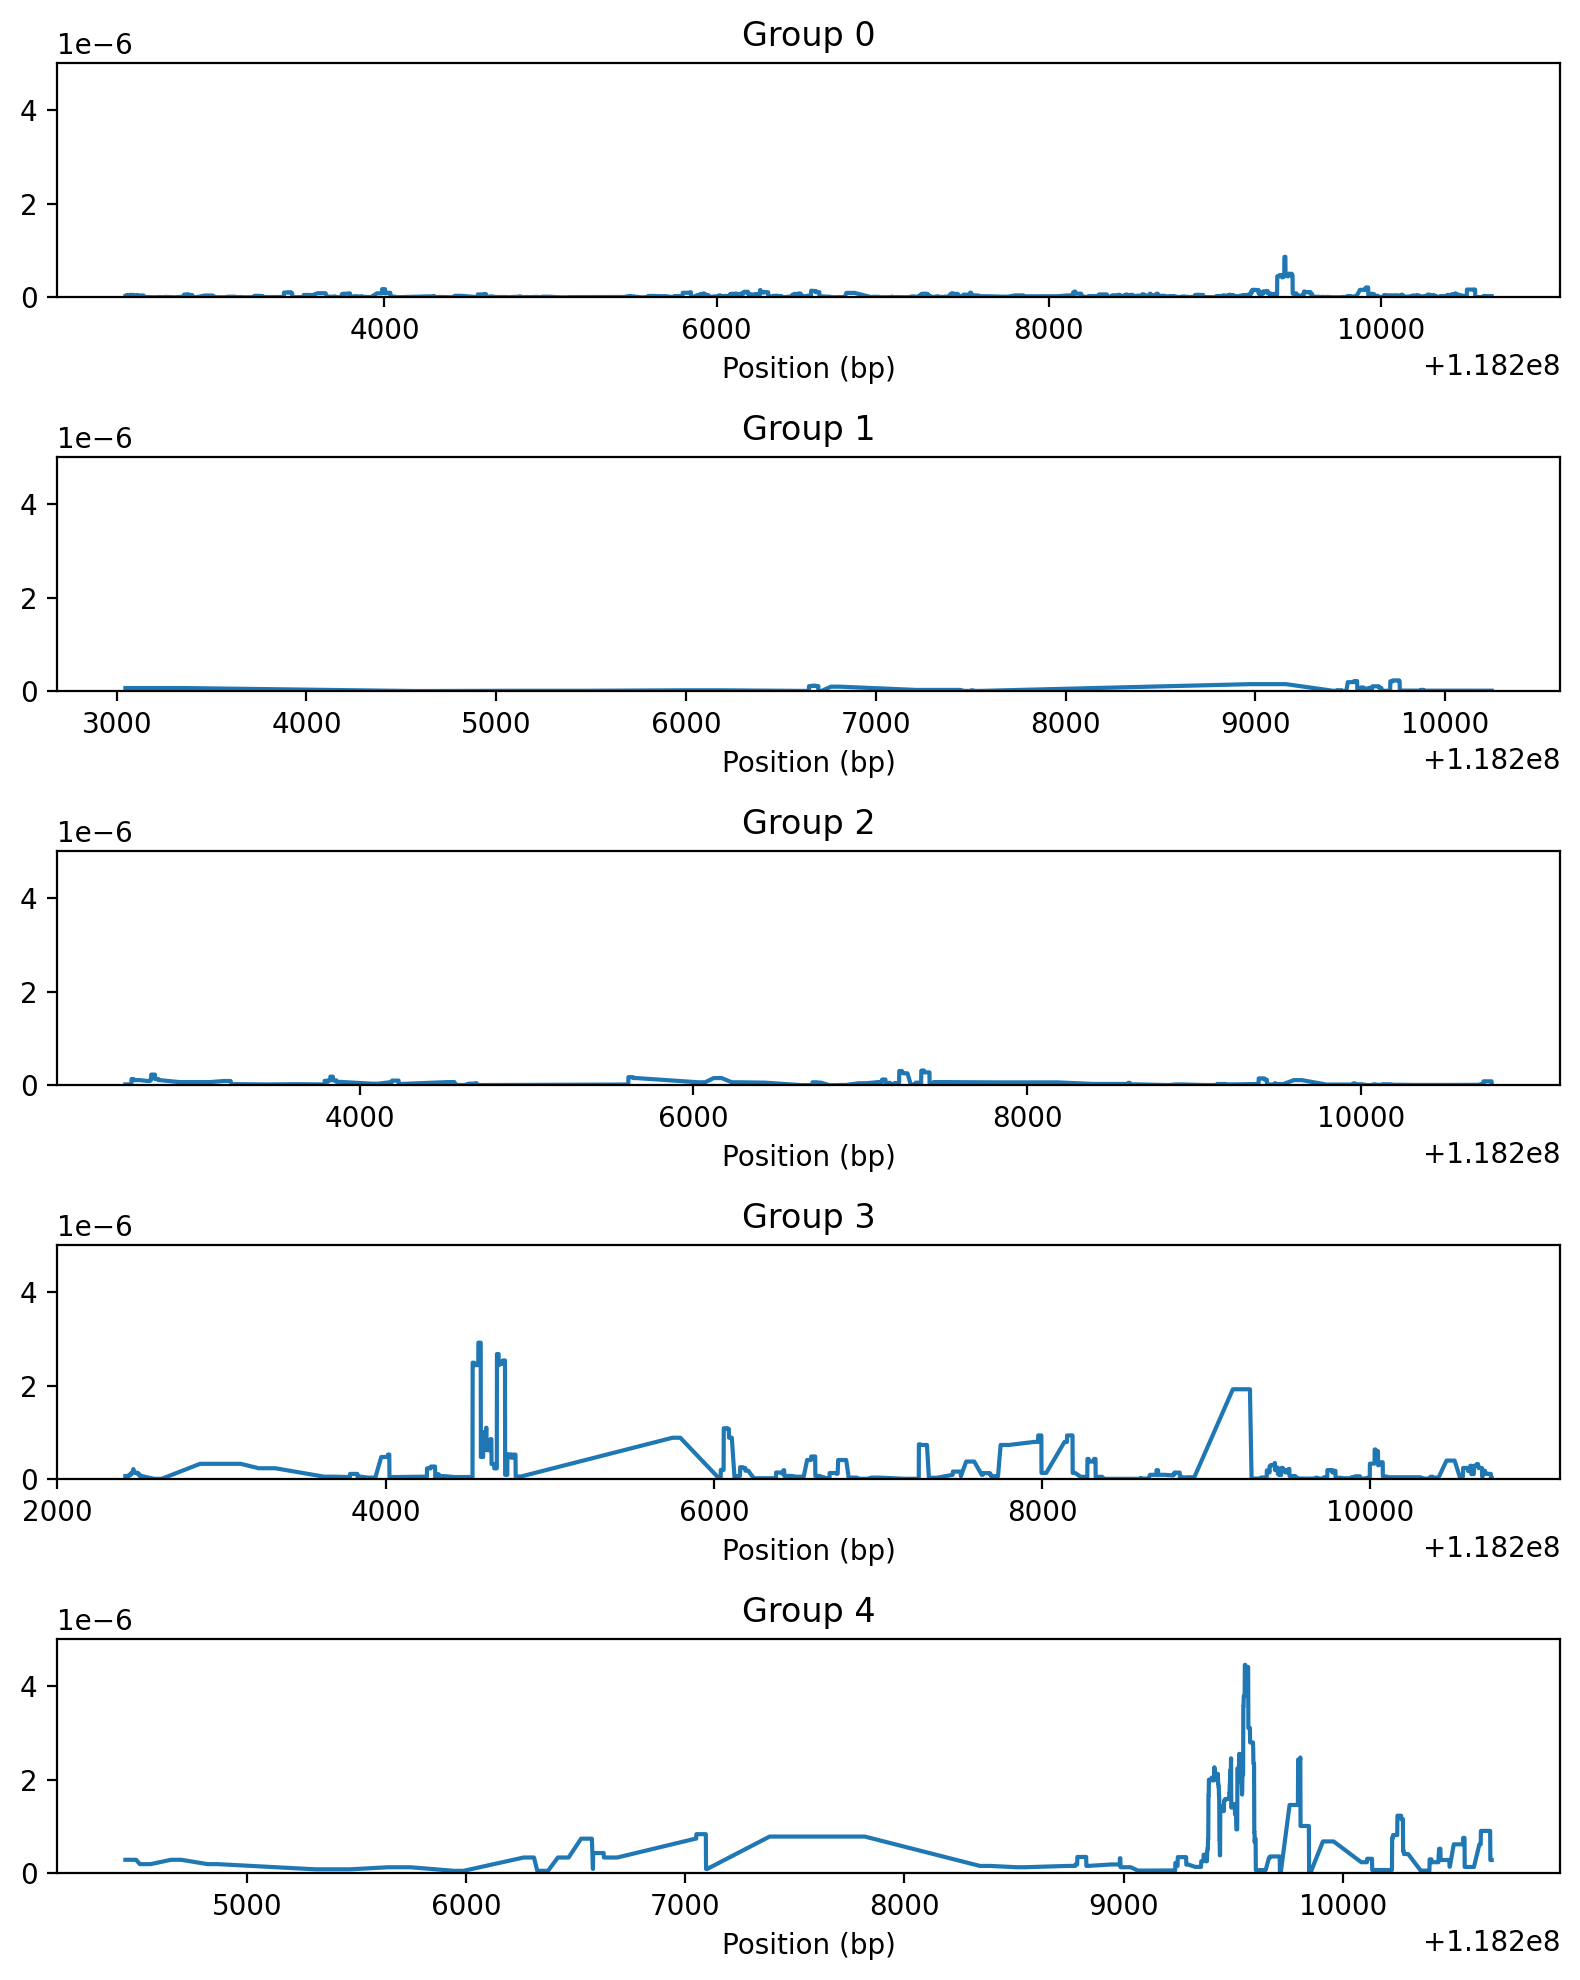

In [4]:
intervals = intervals_cudf.to_pandas()
groups = np.unique(intervals['group'])
n_groups = len(groups)

fig, axs = plt.subplots(nrows = n_groups, ncols = 1, figsize = (8, 2*n_groups), dpi=200)

for (i, group) in enumerate(groups):
    df_group = intervals.loc[intervals['group'] == group]
    axs[i].plot(df_group['start'], df_group['normalized_total'])
    axs[i].set_title(f'Group {i}')
    axs[i].set_ylim([0.0, 5e-6])
    axs[i].set_xlabel('Position (bp)')

plt.tight_layout()
plt.show()